In [64]:
import numpy as np
import pandas as pd

# Model
import math
from math import log,exp
from scipy.special import beta,comb,digamma,betaln

# Helpers
import os
import sys
sys.path.insert(0,'../')
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,confusion_matrix,log_loss
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


import warnings
warnings.filterwarnings('ignore')

In [42]:
store = dict()
for f in os.listdir('predictions/LOO_MAP_1/'):
    _,_,t = f.split('_')
    t = float(t.replace('.csv',''))
    pred = pd.read_csv('predictions/LOO_MAP_1/'+f)
    auroc = roc_auc_score(pred['y_true'],pred['y_proba_pos'])
    logloss = log_loss(pred['y_true'],pred['y_proba_pos'])
    store[t] = [auroc,logloss]
        

In [110]:
store2 = dict()
for f in os.listdir('predictions/LOO_MAP_2/'):
    _,_,t = f.split('_')
    t = float(t.replace('.csv',''))
    pred = pd.read_csv('predictions/LOO_MAP_2/'+f)
    auroc = roc_auc_score(pred['y_true'],pred['y_proba_pos'])
    logloss = log_loss(pred['y_true'],pred['y_proba_pos'])
    store2[t] = [auroc,logloss]
        

In [114]:
df2 = pd.DataFrame(store2,index=['auroc','log_loss'])

In [115]:
df

,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,...,0.25,0.26,0.27,0.28,0.29,0.3,0.35,0.4,0.45,0.5
auroc,0.409231,0.298462,0.330769,0.593077,0.670000,0.503077,0.495385,0.495385,0.560769,0.627692,...,0.699231,0.626923,0.418462,0.426154,0.524615,0.533846,0.717692,0.498462,0.651154,0.303846
log_loss,0.765333,0.891922,0.823195,0.672547,0.616007,0.722297,0.725661,0.725661,0.758634,0.681972,...,0.908605,0.965230,1.526820,1.462277,1.192146,1.176522,1.085614,2.285061,2.645646,4.124477


In [113]:
df2

,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.35,0.4,0.45,0.5
auroc,0.643846,0.484615,0.466154,0.466154,0.506923,0.630769,0.549231,0.549231,0.549231,0.450769,0.696923,0.660000,0.400769,0.406154,0.783077,0.512308,0.850385,0.050769
log_loss,0.739228,0.917460,0.918540,0.918540,0.975130,0.801700,1.010265,1.010265,1.010265,1.242876,1.225725,1.331092,2.582782,2.538896,1.399642,2.348147,2.443334,5.865712


In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# ax1.plot(df2.columns.values,df2.loc['log_loss'],marker='o')
# ax1.set_xlabel('p-value threshold')
# ax1.set_ylabel('log_loss')
# ax1.set_title('logloss')
# ax2.plot(df2.columns.values,df2.loc['auroc'],marker='o')
# ax2.set_xlabel('p-value threshold')
# ax2.set_ylabel('auroc')

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# ax1.plot(df.columns.values,df.loc['log_loss'],marker='o')
# ax1.set_xlabel('p-value threshold')
# ax1.set_ylabel('log_loss')
# ax1.set_title('logloss')
# ax2.plot(df.columns.values,df.loc['auroc'],marker='o')
# ax2.set_xlabel('p-value threshold')
# ax2.set_ylabel('auroc')

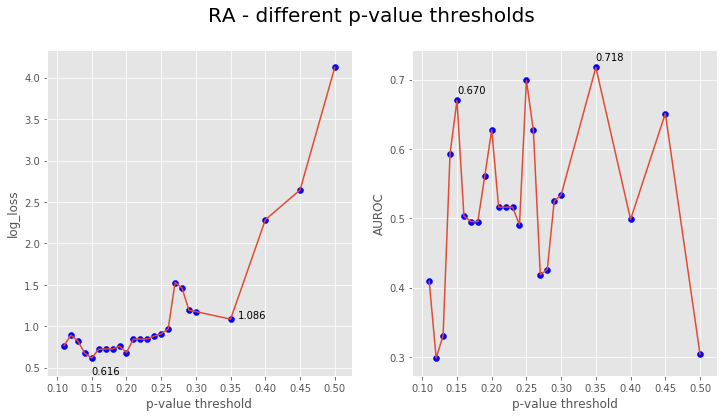

In [109]:
fig = plt.figure(figsize=(12, 6))
plt.suptitle('RA - different p-value thresholds',fontsize=20)
ax = plt.subplot(121)
plt.plot(df.columns.values,df.loc['log_loss'])
plt.scatter(df.columns.values,df.loc['log_loss'],c='b')
plt.xlabel('p-value threshold')
plt.ylabel('log_loss', multialignment='center')
max_ind = df.loc['auroc'].tolist().index(max(df.loc['auroc'].tolist()))
plt.annotate('%.3f'%df.loc['log_loss'].tolist()[max_ind], (df.columns.values.tolist()[max_ind]+0.01, df.loc['log_loss'].tolist()[max_ind]+0.01))
min_ind = df.loc['log_loss'].tolist().index(min(df.loc['log_loss'].tolist()))
plt.annotate('%.3f'%df.loc['log_loss'].tolist()[min_ind], (df.columns.values.tolist()[min_ind], df.loc['log_loss'].tolist()[min_ind]-0.2))
# plt.text(2, 7, 'this is\nyet another test',
#          rotation=45,
#          horizontalalignment='center',
#          verticalalignment='top',
#          multialignment='center')

plt.grid(True)

plt.subplot(122)

plt.plot(df.columns.values,df.loc['auroc'])
plt.scatter(df.columns.values,df.loc['auroc'],c='b')
plt.xlabel('p-value threshold')
plt.ylabel('AUROC', multialignment='center')
min_ind = df.loc['log_loss'].tolist().index(min(df.loc['log_loss'].tolist()))
plt.annotate('%.3f'%df.loc['auroc'].tolist()[min_ind], (df.columns.values.tolist()[min_ind], df.loc['auroc'].tolist()[min_ind]+0.01))
max_ind = df.loc['auroc'].tolist().index(max(df.loc['auroc'].tolist()))
plt.annotate('%.3f'%df.loc['auroc'].tolist()[max_ind], (df.columns.values.tolist()[max_ind], df.loc['auroc'].tolist()[max_ind]+0.01))


# plt.axhline(0.4)
# plt.title("test line spacing for multiline text")

plt.show()
fig.savefig('outputs/RA_diff_threshods.png')

In [56]:
df2

,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.35,0.4,0.45,0.5
auroc,0.643846,0.484615,0.466154,0.466154,0.506923,0.630769,0.549231,0.549231,0.549231,0.450769,0.696923,0.660000,0.400769,0.406154,0.783077,0.512308,0.850385,0.050769
log_loss,0.739228,0.917460,0.918540,0.918540,0.975130,0.801700,1.010265,1.010265,1.010265,1.242876,1.225725,1.331092,2.582782,2.538896,1.399642,2.348147,2.443334,5.865712


In [51]:
df

,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,...,0.25,0.26,0.27,0.28,0.29,0.3,0.35,0.4,0.45,0.5
auroc,0.409231,0.298462,0.330769,0.593077,0.670000,0.503077,0.495385,0.495385,0.560769,0.627692,...,0.699231,0.626923,0.418462,0.426154,0.524615,0.533846,0.717692,0.498462,0.651154,0.303846
log_loss,0.765333,0.891922,0.823195,0.672547,0.616007,0.722297,0.725661,0.725661,0.758634,0.681972,...,0.908605,0.965230,1.526820,1.462277,1.192146,1.176522,1.085614,2.285061,2.645646,4.124477


In [ ]:
# fpr2, tpr2, thresholds2 = roc_curve(test_y, pos_prob_test)
# plt.figure(figsize=(6,6))
# plt.plot(fpr,tpr,label='Baseline:0.940')
# plt.plot(fpr2,tpr2,label='RandomForest:0.951')
# plt.legend()

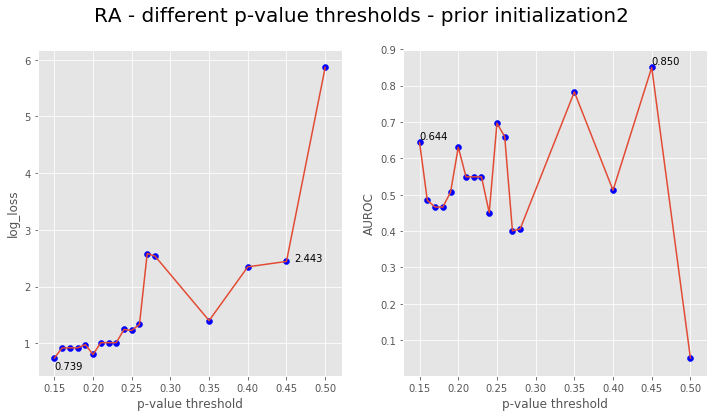

In [116]:
fig = plt.figure(figsize=(12, 6))
plt.suptitle('RA - different p-value thresholds - prior initialization2',fontsize=20)
ax = plt.subplot(121)
plt.plot(df2.columns.values,df2.loc['log_loss'])
plt.scatter(df2.columns.values,df2.loc['log_loss'],c='b')
plt.xlabel('p-value threshold')
plt.ylabel('log_loss', multialignment='center')
max_ind = df2.loc['auroc'].tolist().index(max(df2.loc['auroc'].tolist()))
plt.annotate('%.3f'%df2.loc['log_loss'].tolist()[max_ind], (df2.columns.values.tolist()[max_ind]+0.01, df2.loc['log_loss'].tolist()[max_ind]+0.01))
min_ind = df2.loc['log_loss'].tolist().index(min(df2.loc['log_loss'].tolist()))
plt.annotate('%.3f'%df2.loc['log_loss'].tolist()[min_ind], (df2.columns.values.tolist()[min_ind], df2.loc['log_loss'].tolist()[min_ind]-0.2))
# plt.text(2, 7, 'this is\nyet another test',
#          rotation=45,
#          horizontalalignment='center',
#          verticalalignment='top',
#          multialignment='center')

plt.grid(True)

plt.subplot(122)

plt.plot(df2.columns.values,df2.loc['auroc'])
plt.scatter(df2.columns.values,df2.loc['auroc'],c='b')
plt.xlabel('p-value threshold')
plt.ylabel('AUROC', multialignment='center')
min_ind = df2.loc['log_loss'].tolist().index(min(df2.loc['log_loss'].tolist()))
plt.annotate('%.3f'%df2.loc['auroc'].tolist()[min_ind], (df2.columns.values.tolist()[min_ind], df2.loc['auroc'].tolist()[min_ind]+0.01))
max_ind = df2.loc['auroc'].tolist().index(max(df2.loc['auroc'].tolist()))
plt.annotate('%.3f'%df2.loc['auroc'].tolist()[max_ind], (df2.columns.values.tolist()[max_ind], df2.loc['auroc'].tolist()[max_ind]+0.01))


# plt.axhline(0.4)
# plt.title("test line spacing for multiline text")

plt.show()
fig.savefig('outputs/RA_diff_threshods2.png')